---

## **Introducción a la Regresión Lineal**  

La **Regresión Lineal** es uno de los algoritmos más fundamentales en el aprendizaje automático (*Machine Learning*) y la estadística. Su objetivo principal es modelar la relación entre una variable dependiente (*target*) y una o más variables independientes (*features*) mediante una línea recta (en el caso de regresión lineal simple) o un hiperplano (en regresión lineal múltiple).  

Es ampliamente utilizado en:  
- Predicción de valores numéricos (precios, ventas, temperaturas).  
- Análisis de tendencias y relaciones entre variables.  
- Como base para modelos más complejos en *Machine Learning*.  

---

## **Teoría de la Regresión Lineal**  

### **1. Conceptos Básicos**  
- **Variable Dependiente (Y)**: Es el valor que queremos predecir.  
- **Variable Independiente (X)**: Es la variable que usamos para hacer la predicción.  
- **Relación Lineal**: Se asume que la relación entre `X` e `Y` puede describirse con la ecuación de una recta:  

  $$
  Y = \beta_0 + \beta_1 X + \epsilon
  $$ 

  Donde:  
  - $ \beta_0 $: *Intercepto* (valor de `Y` cuando `X = 0`).  
  - $ \beta_1 $: *Pendiente* (cambio en `Y` por unidad de cambio en `X`).  
  - $ \epsilon $: *Error aleatorio* (diferencia entre el valor real y el predicho).  

### **2. Regresión Lineal Simple vs. Múltiple**  
- **Simple**: Solo una variable predictora (`X`).  
  $$
  Y = \beta_0 + \beta_1 X
  $$ 
- **Múltiple**: Varias variables predictoras (`X₁, X₂, ..., Xₙ`).  
  $$
  Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n
  $$  

### **3. Método de Mínimos Cuadrados**  
El objetivo es encontrar los valores de \( \beta_0 \) y \( \beta_1 \) que **minimicen la suma de los errores al cuadrado** (diferencia entre los valores reales y los predichos):  

$$
\text{Minimizar} \sum_{i=1}^{n} (Y_i - \hat{Y_i})^2
$$ 

Donde $ \hat{Y_i} $ es el valor predicho por el modelo.  

### **4. Evaluación del Modelo**  
Para saber qué tan bien se ajusta el modelo, usamos métricas como:  
- **R² (Coeficiente de Determinación)**: Mide la proporción de la varianza de `Y` explicada por `X`.  
  - R² cercano a **1** → Buen ajuste.  
  - R² cercano a **0** → Mal ajuste.  
- **Error Cuadrático Medio (MSE)**: Promedio de los errores al cuadrado.  
  $$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y_i})^2
  $$  

### **5. Supuestos de la Regresión Lineal**  
Para que el modelo sea válido, se deben cumplir:  
1. **Linealidad**: La relación entre `X` e `Y` debe ser lineal.  
2. **Independencia de errores**: Los residuos no deben estar correlacionados.  
3. **Homocedasticidad**: Los errores deben tener varianza constante.  
4. **Normalidad de residuos**: Los residuos deben distribuirse normalmente.  


---

### **Conclusión**  
La regresión lineal es una herramienta poderosa para entender relaciones entre variables y hacer predicciones. Con esta base teórica, podrás interpretar mejor tus códigos y ajustar modelos más eficientes.  


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Primero carguemos y exploremos los datos:

In [2]:
data = pd.read_csv('datos.csv')
data.head()


,X,Y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [3]:
data.isnull().sum()

X    0
Y    0
dtype: int64

In [4]:
data.describe()

,X,Y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


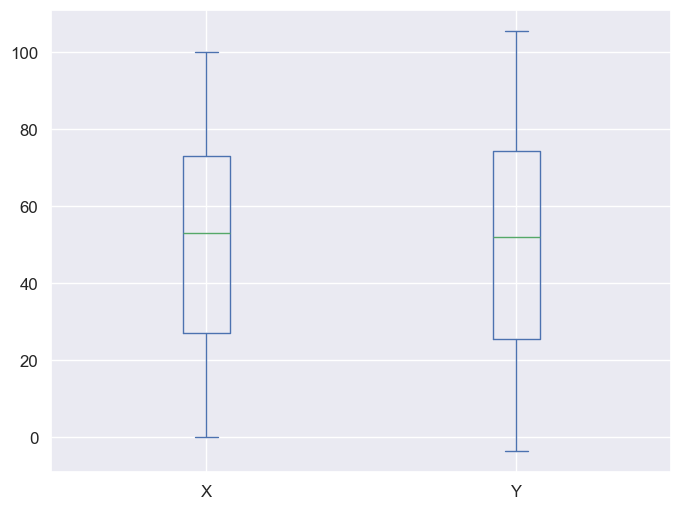

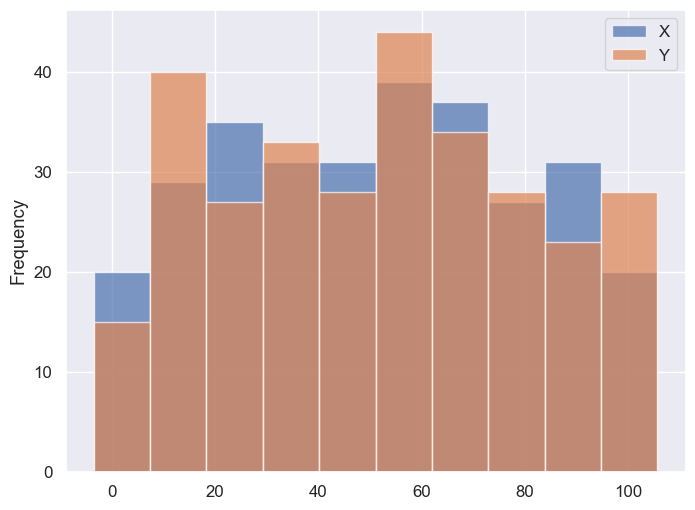

In [5]:
sns.set(font_scale=1.1)
data.plot.box(figsize=(8,6))
plt.show()
sns.set(font_scale=1.1)
data.plot.hist(figsize=(8,6),alpha=0.7)
plt.show()

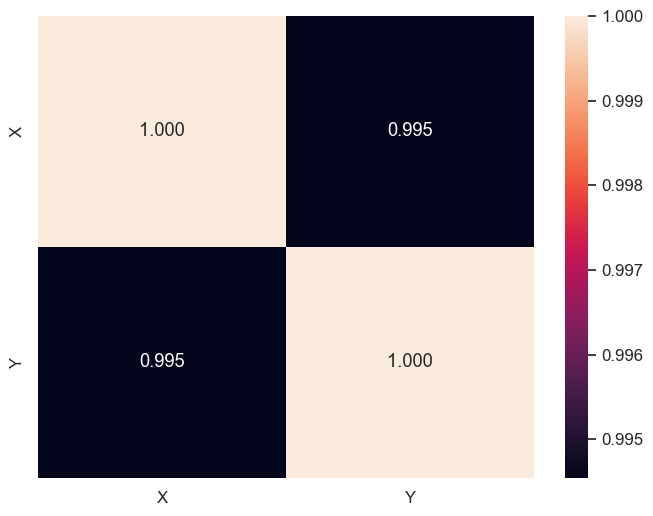

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(
    data.corr(),
    annot=True,
    fmt=".3f",
    )
plt.show()

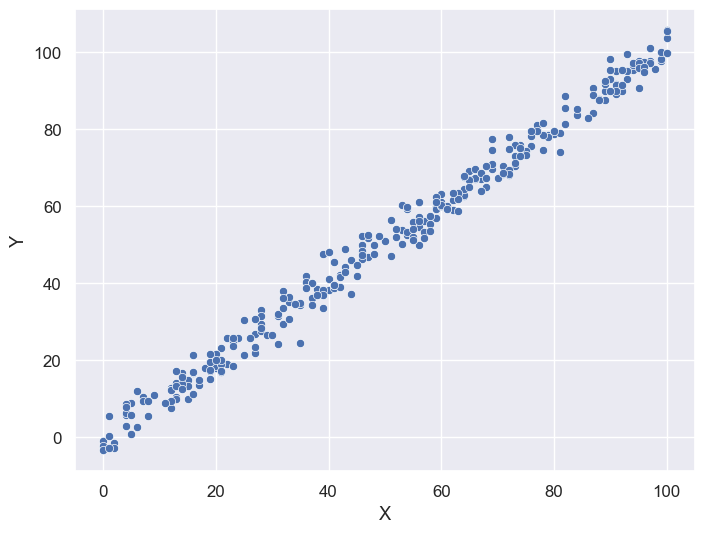

In [7]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.1)
sns.scatterplot(data=data,x='X',y='Y')
plt.show()

Ahora apliquemos minimos cuadrados para determinar los coeficientes de la recta que se ajustan a los datos:

In [8]:
data['ones']=1
X = data[['X','ones']].values
Y = data.Y.values[:,np.newaxis]
coefficients=(np.linalg.inv(X.T@X)@X.T)@Y #@me permite multiplicar matrices
coefficients

array([[ 1.01433536],
       [-0.46181077]])

In [9]:
predictions = data[['X','ones']].values@coefficients
predictions.shape

(300, 1)

Pasemos a visualizar los resultados:

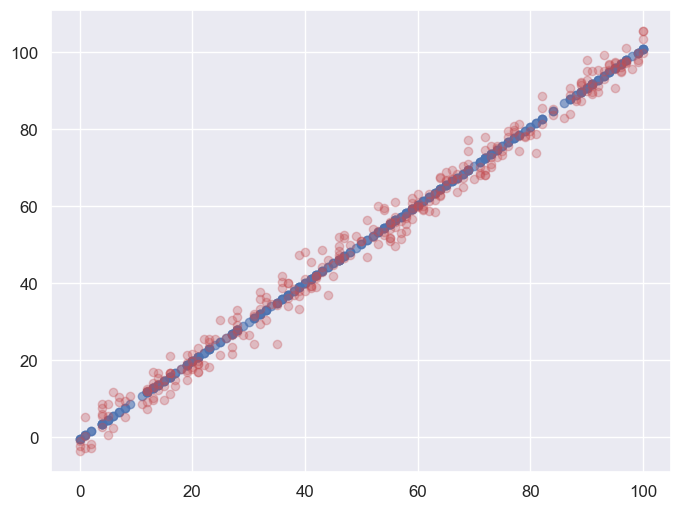

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(data.X.values,predictions.flatten(),c='b',alpha=0.6)
plt.scatter(data.X.values,data.Y.values,c='r',alpha=0.3)
plt.show()

Calculemos la métrica de desempeño R2:

### **Explicación del Código**  

#### **Variables y Fórmulas Involucradas**  
1. **`SSE` (Sum of Squared Errors)**: Suma de los errores al cuadrado (diferencias entre predicciones y valores reales).  
   - Fórmula:  
     $$
     SSE = \sum_{i=1}^{n} (Y_i - \hat{Y_i})^2
     $$  
   - Donde:  
     - $ Y_i $: Valor real.  
     - $ \hat{Y_i} $: Valor predicho.  

2. **`SST` (Total Sum of Squares)**: Suma total de cuadrados (variabilidad total de los datos).  
   - Fórmula:  
     $$
     SST = \sum_{i=1}^{n} (Y_i - \bar{Y})^2
     $$  
   - Donde $ \bar{Y} $ es la media de los valores reales.  

3. **`R²` (Coeficiente de Determinación)**: Mide la proporción de la varianza explicada por el modelo.  
   - Fórmula:  
     $$
     R^2 = 1 - \frac{SSE}{SST}
     $$  
   - Rango:  
     - $ R^2 = 1 $: Modelo perfecto.  
     - $ R^2 \leq 0 $: Modelo no explica la variabilidad.  

---

### **Desglose del Código**  

```python
SSE = ((predictions.flatten() - data.Y.values)**2).sum()
```
- **`predictions.flatten()`**: Convierte las predicciones a un array 1D (ej. `[2.1, 3.8, ...]`).  
- **`data.Y.values`**: Valores reales de la variable objetivo (`Y`).  
- **`(predictions - Y)**2`**: Calcula el error cuadrático para cada punto.  
- **`.sum()`**: Suma todos los errores cuadráticos → **SSE**.  

```python
mean = predictions.mean()
```
- Calcula la media de las predicciones (\( \bar{Y} \)).  

```python
SST = ((mean - predictions.flatten())**2).sum()
```
- **`(mean - predictions)**2`**: Calcula la desviación cuadrática de cada predicción respecto a la media.  
- **`.sum()`**: Suma todas las desviaciones → **SST**.  

```python
R2 = 1 - SSE/SST
```
- Aplica la fórmula de \( R^2 \).  

```python
round(R2, 3)
```
- Redondea el resultado a 3 decimales para legibilidad.  

---

### **Interpretación de \( R^2 \)**  
- **Ejemplo**: Si \( R^2 = 0.85 \), el modelo explica el **85%** de la variabilidad de `Y`.  
- **Advertencia**:  
  - \( R^2 \) alto no siempre implica un buen modelo (puede haber *overfitting*).  
  - \( R^2 \) puede ser negativo si el modelo es peor que usar solo la media.  

---

### **Notas Clave**  
1. **`SSE` vs `SST`**:  
   - `SSE` mide los errores del modelo.  
   - `SST` mide la variabilidad total de los datos.  
2. **¿Por qué `predictions.flatten()`?**  
   - Asegura que las predicciones sean un array 1D (evita errores de dimensión).  

In [11]:
SSE = ((predictions.flatten()-data.Y.values)**2).sum()
mean = predictions.mean()
SST = ((mean - predictions.flatten())**2).sum()
R2 = 1 - SSE/SST
round(R2,3)

np.float64(0.989)

Por último, realicemos los mismos procedimientos pero usando Scikit Learn:

In [12]:
model = LinearRegression().fit(data.X.values.reshape(-1, 1),data.Y.values.reshape(-1, 1))
model.coef_,model.intercept_

(array([[1.01433536]]), array([-0.46181077]))

In [13]:
pred_sk = model.predict(data.X.values.reshape(-1, 1))

In [14]:
model.score(data.X.values.reshape(-1, 1),data.Y.values.reshape(-1, 1))

0.9891203611402716

¿Hay diferencia entre los resultados de ambos métodos?

In [15]:
np.linalg.norm(pred_sk-predictions)

np.float64(3.6687977930095747e-13)